In [1]:
import tensorflow as tf 
(x_train, y_train), (x_test, y_test)= tf.keras.datasets.fashion_mnist.load_data()

In [2]:
x_train.shape

(60000, 28, 28)

In [3]:
import matplotlib.pyplot as plt

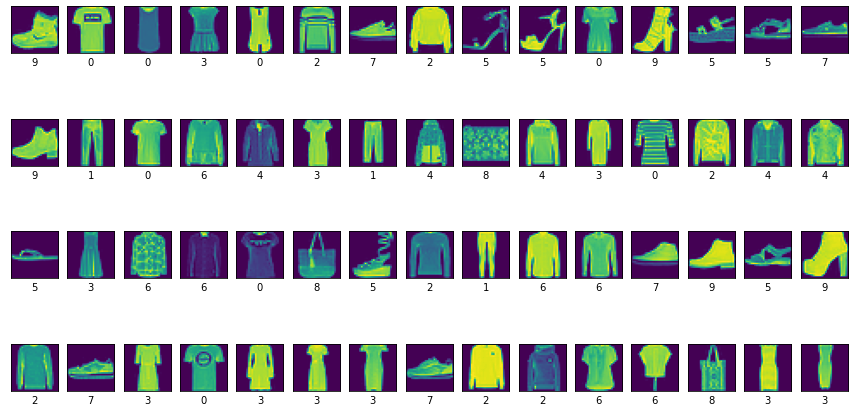

In [4]:
fig=plt.figure(figsize=(15,10))
columns=15
rows=5
for i in range(60):
    fig.add_subplot(rows,columns,i+1)
    plt.imshow(x_train[i])
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(y_train[i])

In [5]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model,Sequential
from tensorflow.keras.applications.vgg19 import VGG19

In [6]:
image_size=[28,28]

In [7]:
from tensorflow.keras.backend import repeat_elements, expand_dims, resize_images

In [8]:
x_train.shape

(60000, 28, 28)

In [9]:
x_train=tf.convert_to_tensor(
    x_train, dtype=None, dtype_hint=None, name=None
)

In [10]:
x_train=tf.reshape(x_train,[60000,28,28,1])

In [11]:
x_train=tf.image.resize(x_train, [32,32])

In [12]:
x_train=tf.image.grayscale_to_rgb(
    x_train, name=None
)

In [13]:
image_size=[32,32]

In [14]:
x_train.shape

TensorShape([60000, 32, 32, 3])

In [15]:
base_convolution = VGG19(input_shape=image_size + [3], weights='imagenet', include_top=False)
#Freeze the layers
for layer in base_convolution.layers:
    layer.trainable=False
x=Flatten()(base_convolution.output)# flatten the outputs of convolution_base
dense=Dense(10,activation='softmax')(x)
model=Model(inputs=base_convolution.input,outputs=dense)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0     

In [16]:
y_train=tf.keras.utils.to_categorical(
    y_train, num_classes=10, dtype='float32'
)

In [17]:
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [18]:
history=model.fit(x_train,y_train,epochs=20,batch_size=64)

Epoch 1/20
938/938 [==============================] - 43s 13ms/step - loss: 1.8950 - accuracy: 0.7340
Epoch 2/20
938/938 [==============================] - 12s 13ms/step - loss: 0.7797 - accuracy: 0.8039
Epoch 3/20
938/938 [==============================] - 12s 13ms/step - loss: 0.6333 - accuracy: 0.8167
Epoch 4/20
938/938 [==============================] - 12s 13ms/step - loss: 0.5939 - accuracy: 0.8203
Epoch 5/20
938/938 [==============================] - 12s 13ms/step - loss: 0.5671 - accuracy: 0.8244
Epoch 6/20
938/938 [==============================] - 12s 13ms/step - loss: 0.5632 - accuracy: 0.8239
Epoch 7/20
938/938 [==============================] - 12s 13ms/step - loss: 0.5524 - accuracy: 0.8248
Epoch 8/20
938/938 [==============================] - 12s 13ms/step - loss: 0.5549 - accuracy: 0.8267
Epoch 9/20
938/938 [==============================] - 13s 13ms/step - loss: 0.5571 - accuracy: 0.8261
Epoch 10/20
938/938 [==============================] - 12s 13ms/step - loss: 0.553

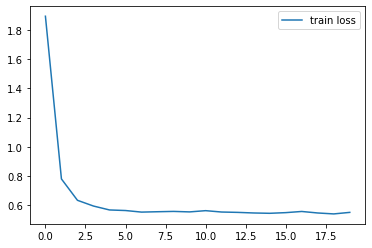

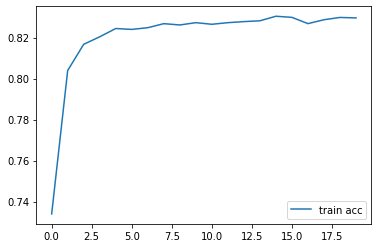

<Figure size 432x288 with 0 Axes>

In [21]:
#Loss Graph
plt.plot(history.history['loss'], label='train loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')
#Accuracy Graph
plt.plot(history.history['accuracy'], label='train acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')